# 파일 경로 및 라이브러리


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/corona_project/corona

/content/drive/My Drive/Colab Notebooks/corona_project/corona


# Policy.csv 확인

In [4]:
data = pd.read_csv("policy/Policy.csv")
data.head(3)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22


In [5]:
data.groupby(['type','gov_policy']).count()

policy_id  ...  end_date
type           gov_policy                                                ...          
Administrative Close bars and clubs                                   1  ...         1
               Close karaoke                                          1  ...         1
               local government Administrative orders                 1  ...         1
Alert          Infectious Disease Alert Level                         4  ...         4
Education      School Closure                                         1  ...         1
               School Opening Delay                                   4  ...         4
               School Opening with Online Class                      10  ...        10
Health         Drive-Through Screening Center                         2  ...         2
               Emergency Use Authorization of Diagnostic Kit          5  ...         5
               Mask Distribution                                      2  ...         2
Immigration    Mandatory 14-day Self-Quarantine                       1  ...         1
               Mandatory Self-Quarantine & Diagonostic Tests          1  ...         1
               Special Immigration Procedure                         13  ...        13
Social         Social Distancing Campaign                             3  ...         3
               Thanks to Challenge korea                              1  ...         1
Technology     Electronic Wristbands                                  1  ...         1
               Open API                                               1  ...         1
               Open Data                                              1  ...         1
               Self-Diagnosis App                                     1  ...         1
               Self-Quarantine Safety Protection App                  1  ...         1
Transformation Logistics center                                       1  ...         1
               Wearing of masks                                       2  ...         2

[22 rows x 5 columns]

# 일일 확진자 수

In [4]:
data_daily = pd.read_csv('seoul_floating/data/daily2.csv', encoding='euc-kr')
data_daily.head(5)

,province,confirmed,date
0,NaN,NaN,NaN
1,검역,3.0,2020-09-03
2,NaN,NaN,NaN
3,제주,0.0,2020-09-03
4,NaN,NaN,NaN


In [5]:
data_daily =data_daily.dropna()
data_daily

,province,confirmed,date
1,검역,3.0,2020-09-03
3,제주,0.0,2020-09-03
5,경남,0.0,2020-09-03
7,경북,0.0,2020-09-03
9,전남,6.0,2020-09-03
...,...,...,...
7377,인천,0.0,2020-03-01
7379,대구,469.0,2020-03-01
7381,부산,3.0,2020-03-01
7383,서울,10.0,2020-03-01


In [8]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 1 to 7385
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   province   3693 non-null   object 
 1   confirmed  3693 non-null   float64
 2   date       3693 non-null   object 
dtypes: float64(1), object(2)
memory usage: 115.4+ KB


### data & confirmed => DataFame

In [6]:
data_group_daily = data_daily.groupby(['date'])['confirmed'].sum()
data_group_daily

date
2020-03-01    1172.0
2020-03-04    1032.0
2020-03-05     876.0
2020-03-06    1036.0
2020-03-07     966.0
               ...  
2020-08-30     598.0
2020-08-31     496.0
2020-09-01     470.0
2020-09-02     534.0
2020-09-03     390.0
Name: confirmed, Length: 184, dtype: float64

In [7]:
df_1=data_group_daily.index
df_2=data_group_daily.values

In [8]:
df = pd.DataFrame([df_2], columns=df_1, index=['confirmed'])
df = df.T

## data & confirmed 시각화

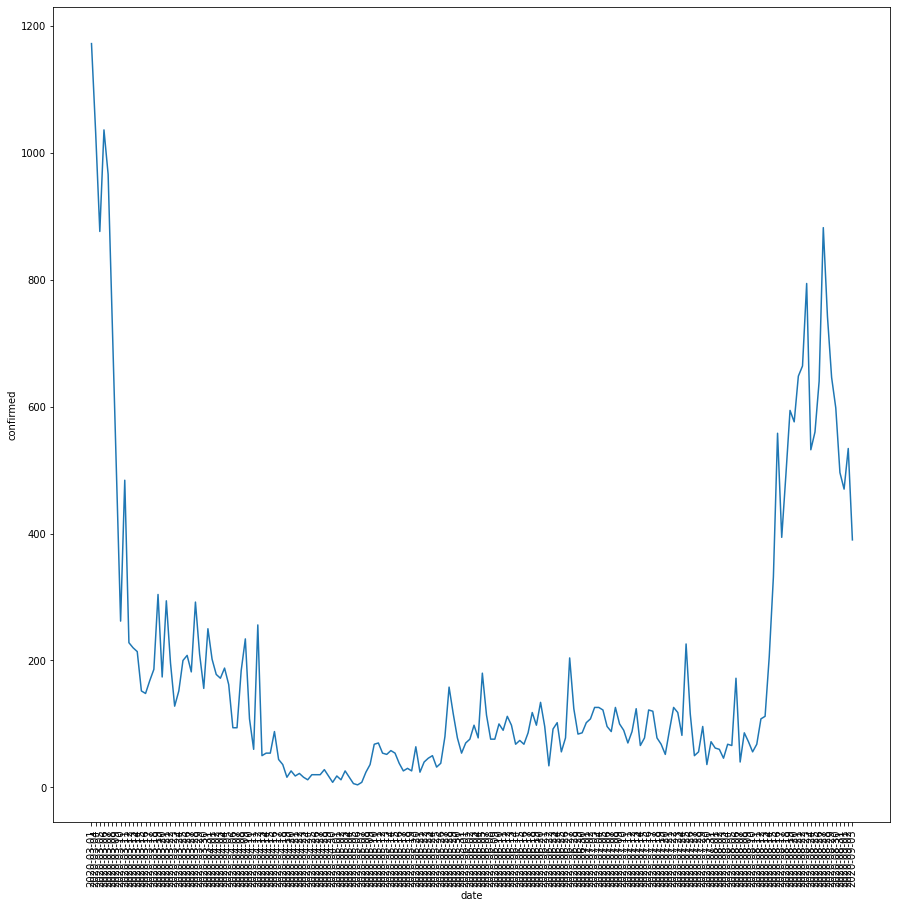

In [9]:
plt.figure(figsize=(15,15))
plt.plot(df)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## 서울시

In [13]:
data_daily['province'].unique()

array(['검역', '제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천', '대구', '부산', '서울', '합계'], dtype=object)

In [14]:
# data_group_province = data_daily.groupby(['province','date'])['confirmed'].sum()
# data_group_province

### 지역별 확진자 수 함수 

In [14]:
def province_date(text):
  # province = text
  data_group_province = data_daily[data_daily['province']==text].groupby(['date']).sum()
  df_1=province_date('서울').index
  df_2=province_date('서울').values
  df_2 = pd.DataFrame(df_2, index=df_1, columns=[text])
  return df_2

In [16]:
data_group_province = data_daily[data_daily['province']==''].groupby(['date']).sum()

In [15]:
df_Seoul = province_date('서울')
df_Jeju = province_date('제주')
df_South_Gyeongsang = province_date('경남')
df_North_Gyeongsang = province_date('경북')
df_South_Jeolla = province_date('전남')
df_North_Jeolla = province_date('전북')
df_South_Chungcheong = province_date('충남')
df_North_Chungcheong = province_date('충북')
df_Gangwon = province_date('강원')
df_Gyeonggi = province_date('경기')
df_Sejong = province_date('세종')
df_Ulsan = province_date('울산')
df_Daejeon = province_date('대전')
df_Gwangju = province_date('광주')
df_Incheon = province_date('인천')
df_Daegu = province_date('대구')
df_Busan = province_date('부산')



RecursionError: ignored

In [12]:
plt.figure(figsize=(15,8))
plt.plot(df_Seoul)
# plt.plot(df_Jeju)
# plt.plot(df_South_Gyeongsang)
# plt.plot(df_North_Gyeongsang)
# plt.plot(df_South_Jeolla)
# plt.plot(df_North_Jeolla)
# plt.plot(df_South_Chungcheong)
# plt.plot(df_North_Chungcheong)
# plt.plot(df_Gangwon)
# plt.plot(df_Gyeonggi)
# plt.plot(df_Sejong)
# plt.plot(df_Ulsan)
# plt.plot(df_Daejeon)
# plt.plot(df_Gwangju)
# plt.plot(df_Incheon)
# plt.plot(df_Daegu)
# plt.plot(df_Busan)

plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

NameError: ignored

<Figure size 1080x576 with 0 Axes>

# 정책

In [16]:
data_policy = pd.read_csv('policy/Policy.csv')
data_policy.head(5)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,2020-09-04
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,2020-09-04


In [17]:
data_policy.groupby(['type','gov_policy']).count()

policy_id  ...  end_date
type           gov_policy                                                ...          
Administrative Close bars and clubs                                   1  ...         1
               Close karaoke                                          1  ...         1
               local government Administrative orders                 1  ...         1
Alert          Infectious Disease Alert Level                         4  ...         4
Education      School Closure                                         1  ...         1
               School Opening Delay                                   4  ...         4
               School Opening with Online Class                      10  ...        10
Health         Drive-Through Screening Center                         2  ...         2
               Emergency Use Authorization of Diagnostic Kit          5  ...         5
               Mask Distribution                                      2  ...         2
Immigration    Mandatory 14-day Self-Quarantine                       1  ...         1
               Mandatory Self-Quarantine & Diagonostic Tests          1  ...         1
               Special Immigration Procedure                         13  ...        13
Social         Social Distancing Campaign                             3  ...         3
               Thanks to Challenge korea                              1  ...         1
Technology     Electronic Wristbands                                  1  ...         1
               Open API                                               1  ...         1
               Open Data                                              1  ...         1
               Self-Diagnosis App                                     1  ...         1
               Self-Quarantine Safety Protection App                  1  ...         1
Transformation Logistics center                                       1  ...         1
               Wearing of masks                                       2  ...         2

[22 rows x 5 columns]

In [18]:
data_date_confirmed = df
data_date_confirmed.head(3)

,confirmed
date,
2020-03-01,1172.0
2020-03-04,1032.0
2020-03-05,876.0


## Administrative

In [ ]:
data_admin = data_policy[data_policy['type'] == 'Administrative']
data_admin

In [ ]:
df_admin = data_date_confirmed['2020-05-08':'2020-06-15']

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(df_admin)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## Alert

In [ ]:
data_alert = data_policy[data_policy['type'] == 'Alert']
data_alert

In [ ]:
df_alert = data_date_confirmed['2020-01-03':'2020-03-31']

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df_alert)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## Education

In [ ]:
data_edu = data_policy[data_policy['type'] == 'Education']
data_edu

In [ ]:
df_edu = data_date_confirmed['2020-03-02':'2020-06-08']

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_edu)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

* 03-10 ~ 03-12 : 
* 03-17 ~ 03-24 : 
* 03-26 ~ 03-31 : 

## Health

In [ ]:
data_health = data_policy[data_policy['type'] == 'Health']
data_health

In [ ]:
df_health = data_date_confirmed['2020-02-04':'2020-06-08']

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_health)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## Immigration

In [ ]:
data_immigration = data_policy[data_policy['type'] == 'Immigration']
data_immigration

In [ ]:
df_immigration = data_date_confirmed['2020-02-04':'2020-04-31']

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_immigration)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## Social & Technology

In [ ]:
data_social = data_policy[data_policy['type'] == 'Social']
data_social

In [ ]:
data_technology = data_policy[data_policy['type'] == 'Technology']
data_technology

## Transformation	

In [ ]:
data_transformation = data_policy[data_policy['type'] == 'Transformation']
data_transformation

In [ ]:
df_transformation = data_date_confirmed['2020-05-27':'2020-06-31']

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_transformation)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

# 전체 기간

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(df)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()

## 교회 및 집회

In [ ]:
df_other = data_date_confirmed['2020-06-31':'2020-09-04']

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(df_other)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('confirmed')
plt.show()